# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [129]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [130]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [131]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [132]:
# Scrape the website
html = browser.html

# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [133]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [134]:
# Create an empty list
mars_temperature = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all('td')
    row_data = {
        "id": cells[0].text,
        "terrestrial_date": cells[1].text,
        "sol": cells[2].text,
        "ls": cells[3].text,
        "month": cells[4].text,
        "min_temp": cells[5].text,
        "pressure": cells[6].text
    }
    mars_temperature.append(row_data)

mars_temperature

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [135]:
# For reference: Code for extracting all rows of data using Pandas read_html
# df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
# mars_temp_df = df[0]

# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(mars_temperature)

In [136]:
# Confirm DataFrame was created successfully
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [137]:
# Examine data type of each column
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [138]:
# Change data types for data analysis
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol'] = mars_temp_df['sol'].astype('int32')
mars_temp_df['ls'] = mars_temp_df['ls'].astype('int32')
mars_temp_df['month'] = mars_temp_df['month'].astype('int32')
mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype('float64')
mars_temp_df['pressure'] = mars_temp_df['pressure'].astype('float64')

In [139]:
# Confirm type changes were successful by examining data types again
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.4+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [140]:
# 1. How many months are there on Mars?
months = mars_temp_df['month'].nunique()
print(f"There are {months} months on Mars.")

There are 12 months on Mars.


In [141]:
# 2. How many sols (Martian days) worth of data are there?
days = mars_temp_df['sol'].nunique()
print(f"There are {days} sols (Martian days) worth of data.")

There are 1867 sols (Martian days) worth of data.


In [142]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_temp_df.groupby('month')['min_temp'].mean().reset_index()
avg_min_temp = pd.DataFrame(avg_min_temp)
avg_min_temp = avg_min_temp.rename(columns={'month': 'Month', 'min_temp': 'Average Minimum Temperature in Celsius'})
avg_min_temp

,Month,Average Minimum Temperature in Celsius
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


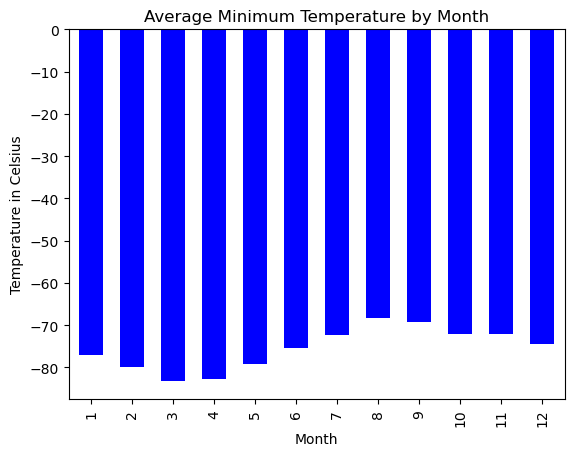

In [143]:
# Plot the average minimum temperature by month
avg_min_temp.plot.bar(x='Month', y='Average Minimum Temperature in Celsius', color='b', align='center', width=0.6, legend=False)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [144]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_sorted = avg_min_temp.sort_values(by='Average Minimum Temperature in Celsius', ascending=True)
avg_min_temp_sorted

,Month,Average Minimum Temperature in Celsius
2,3,-83.307292
3,4,-82.747423
1,2,-79.932584
4,5,-79.308725
0,1,-77.160920
5,6,-75.299320
11,12,-74.451807
6,7,-72.281690
10,11,-71.985507
9,10,-71.982143


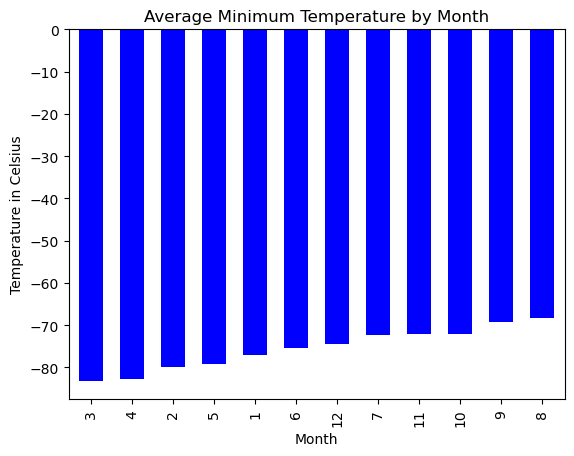

In [145]:
avg_min_temp_sorted.plot.bar(x='Month', y='Average Minimum Temperature in Celsius', color='b', align='center', width=0.6, legend=False)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [146]:
# 4. What is the average pressure by month?
avg_pressure = mars_temp_df.groupby('month')['pressure'].mean().reset_index()
avg_pressure = pd.DataFrame(avg_pressure)
avg_pressure = avg_pressure.rename(columns={'month': 'Month', 'pressure': 'Average Pressure'})
avg_pressure

,Month,Average Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


In [147]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_sorted = avg_pressure.sort_values(by='Average Pressure', ascending=True)
avg_pressure_sorted

,Month,Average Pressure
5,6,745.054422
4,5,748.557047
6,7,795.105634
3,4,806.329897
11,12,842.156627
10,11,857.014493
0,1,862.488506
7,8,873.829787
2,3,877.322917
9,10,887.312500


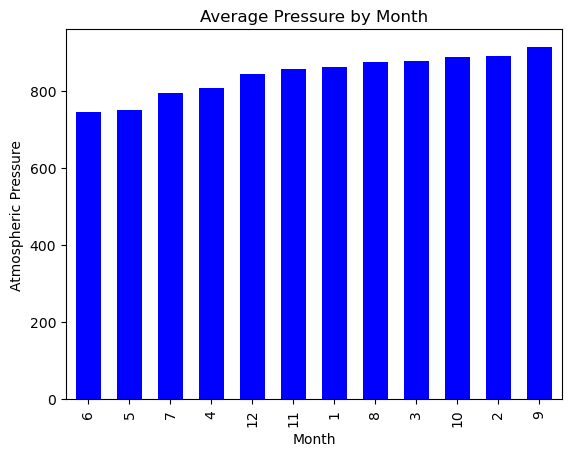

In [148]:
avg_pressure_sorted.plot.bar(x='Month', y='Average Pressure', color='b', align='center', width=0.6, legend=False)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

In [149]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Assign a unique day number to each group of unique dates
mars_temp_df['day_number'] = pd.factorize(mars_temp_df['terrestrial_date'])[0] + 1
mars_temp_df = mars_temp_df.drop(columns=['max_temp'])
mars_temp_df

KeyError: "['max_temp'] not found in axis"

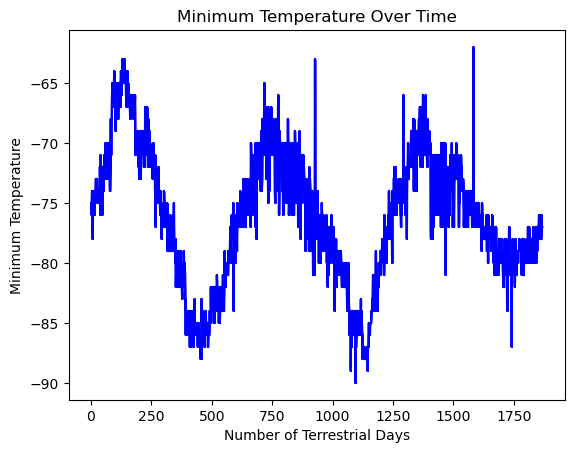

In [ ]:
# Calculate the minimum temperature and maximum temperature on each unique day
mars_temp_df['min_temp'] = mars_temp_df.groupby('day_number')['min_temp'].transform('min')
mars_temp_df['max_temp'] = mars_temp_df.groupby('day_number')['min_temp'].transform('max')

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(mars_temp_df['day_number'], mars_temp_df['min_temp'], color='blue')
plt.plot(mars_temp_df['day_number'], mars_temp_df['min_temp'], color='blue')
plt.fill_between(mars_temp_df['day_number'], mars_temp_df['min_temp'], mars_temp_df['min_temp'], color='blue')
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.show()

#### Minimum Temperature

Which month, on average, has the lowest temperature? The highest?

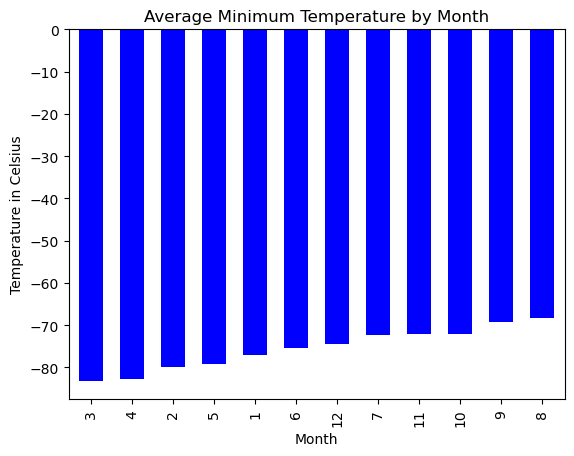

On average, March has the lowest temperature and August has the highest temperature.


In [ ]:
avg_min_temp_sorted.plot.bar(x='Month', y='Average Minimum Temperature in Celsius', color='b', align='center', width=0.6, legend=False)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()
print(f"On average, March has the lowest temperature and August has the highest temperature.")

#### Atmospheric Pressure

Which month, on average, has the lowest atmospheric pressure? The highest?

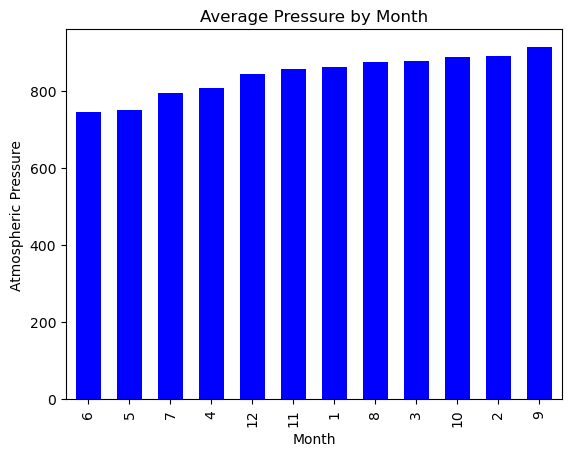

On average, June has the lowest atmospheric pressure and September has the highest atmospheric pressure.


In [ ]:
avg_pressure_sorted.plot.bar(x='Month', y='Average Pressure', color='b', align='center', width=0.6, legend=False)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()
print(f"On average, June has the lowest atmospheric pressure and September has the highest atmospheric pressure.")

#### Year Length

How many terrestrial days exist in a Martian year?

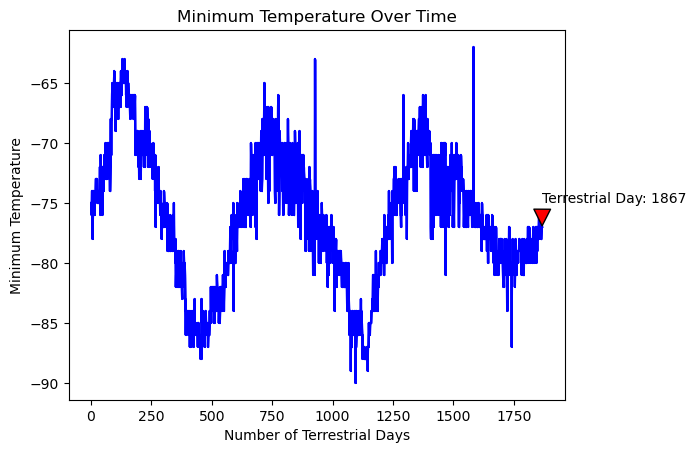

There are 1867 terrestrial days in a Martian year.


In [ ]:
plt.plot(mars_temp_df['day_number'], mars_temp_df['min_temp'], color='blue')
plt.plot(mars_temp_df['day_number'], mars_temp_df['min_temp'], color='blue')
plt.fill_between(mars_temp_df['day_number'], mars_temp_df['min_temp'], mars_temp_df['min_temp'], color='blue')
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')

last_day_number = mars_temp_df['day_number'].iloc[-1]
last_min_temp = mars_temp_df['min_temp'].iloc[-1]
plt.annotate(f"Terrestrial Day: {last_day_number}", 
             xy=(last_day_number, last_min_temp), 
             xytext=(last_day_number + 0.5, last_min_temp + 2),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()
print(f"There are 1867 terrestrial days in a Martian year.")

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
mars_temp_df.to_csv('mars_temp_df.csv', index=False)

In [ ]:
browser.quit()